In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset oficial de Airbnb NYC 2019
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv"

df_airbnb = pd.read_csv(url)

In [5]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


FASE 1: Limpieza Táctica (Detectando Estafas)
1) Inspección: Haz un info().

* Ojo: La columna reviews_per_month tiene muchos nulos. Si es nulo, significa que no tuvo reviews.

* Acción: Rellena esos nulos con 0.

2) Precios Rotos: En Airbnb, un precio de $0 es un error del sistema o una estafa, y un precio de $10,000 suele ser una broma o un dato basura.

* Acción: Filtra el DataFrame para quedarte solo con precios lógicos: Mayores a 0 y Menores a 1000. (Eliminamos el lujo extremo para ver el mercado normal).

In [15]:
#filtro solo entre 0 y 1000 usd de precio
df_airbnb=df_airbnb[(df_airbnb['price']>0)&(df_airbnb['price']<1000)]
#relleno las reviews por mes
df_airbnb['reviews_per_month']=df_airbnb['reviews_per_month'].fillna(0)
df_airbnb.isnull().sum()

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9890
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

FASE 2: El Mapa de Calor Geográfico (Scatterplot + Lat/Long) 🗺️
Tienes columnas latitude y longitude. ¡Podemos dibujar el mapa de NY!

1) Haz un Scatter Plot.

* Eje X: longitude

* Eje Y: latitude

* Hue: neighbourhood_group (Para que cada distrito -Manhattan, Brooklyn, etc.- tenga un color).

* Tip: Usa alpha=0.5 para ver dónde hay más densidad de puntos.

Pregunta: Viendo el mapa, ¿qué distrito parece tener más densidad de alojamientos?

<Axes: xlabel='longitude', ylabel='latitude'>

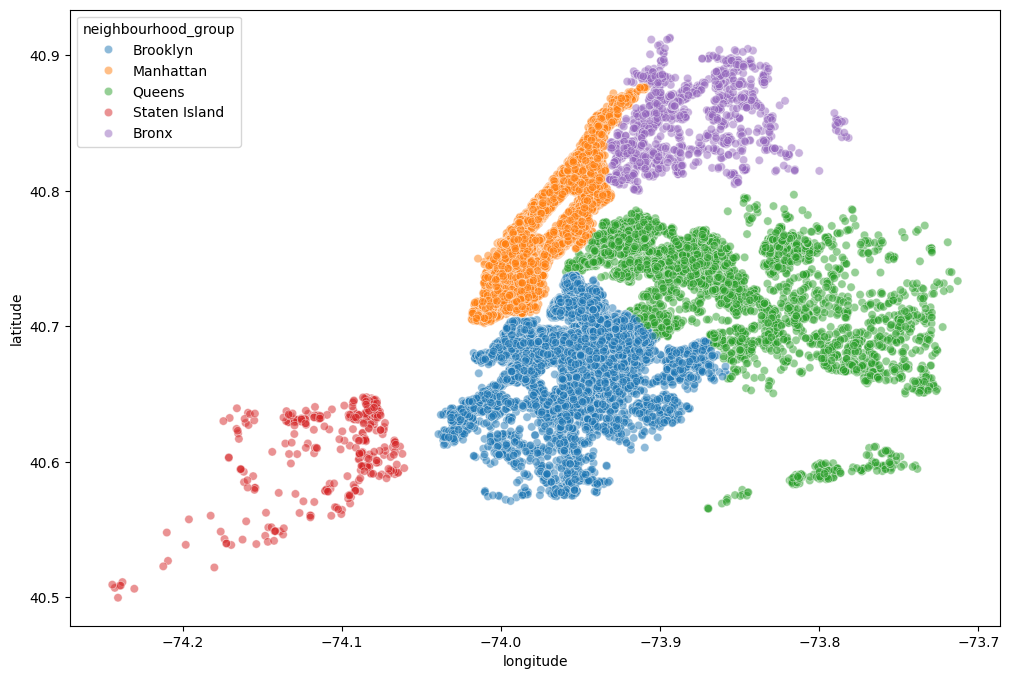

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_airbnb, x='longitude',y='latitude',hue='neighbourhood_group',alpha=0.5)

FASE 3: La Pregunta de Negocio (¿Dónde es más caro?)
Tu cliente quiere invertir. ¿Dónde puede cobrar más?

1) Agrupación: Agrupa por neighbourhood_group.

2) Cálculo: Calcula el precio promedio (mean) de cada distrito.

3) Orden: Ordena de mayor a menor.

* Pregunta: ¿Cuál es el distrito más caro promedio y cuál es el más barato?

In [18]:
df_airbnb.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        177.375017
Brooklyn         117.288246
Staten Island     96.148649
Queens            94.528038
Bronx             84.521140
Name: price, dtype: float64

FASE 4: Análisis de Palabras (Text Mining Básico)
Queremos saber qué palabras usan los dueños para vender.

1) Filtra los alojamientos de Manhattan.

2) Busca en la columna name cuántas veces aparece la palabra "Luxury".

* Pista: df[df['name'].str.contains('Luxury', case=False, na=False)]

Pregunta: ¿Cuántos alojamientos en Manhattan se venden como "Luxury"?

In [22]:
manhattan=df_airbnb[df_airbnb['neighbourhood_group']=='Manhattan']
manhattan['name'].str.contains('Luxury', case=False, na=False).sum()

np.int64(1084)